<a href="https://colab.research.google.com/github/lovemikassa/StatPrac/blob/main/dz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание.**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('flights.csv', low_memory = False)
flights.head()
flights = flights[flights['ORIGIN_AIRPORT'].str.len() == 3]

Средняя задержка рейсов в зависимости от аэропортов

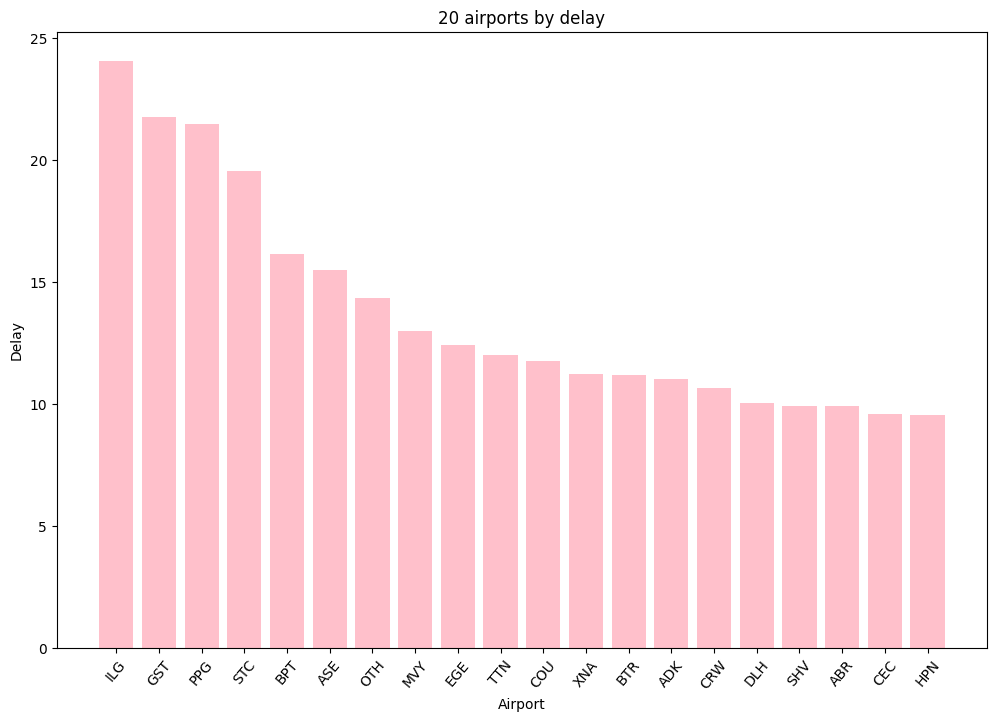

In [55]:
mea = flights.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().reset_index()

per = mea.nlargest(20, 'ARRIVAL_DELAY')

plt.figure(figsize = (12, 8))
plt.bar(per['ORIGIN_AIRPORT'], per['ARRIVAL_DELAY'], color = 'pink')
plt.title('20 airports by delay')
plt.xlabel('Airport')
plt.ylabel('Delay')
plt.xticks(rotation = 50)
plt.show()


Средняя задержка рейсов для конкретной авиакомпании.

   AIRLINE  ARRIVAL_DELAY
0       AA      60.305937
1       AS      48.473580
2       B6      61.600906
3       DL      61.515989
4       EV      63.074680
5       F9      67.948979
6       HA      39.707423
7       MQ      62.874715
8       NK      63.795501
9       OO      60.732667
10      UA      64.806613
11      US      50.290432
12      VX      56.291877
13      WN      52.434281


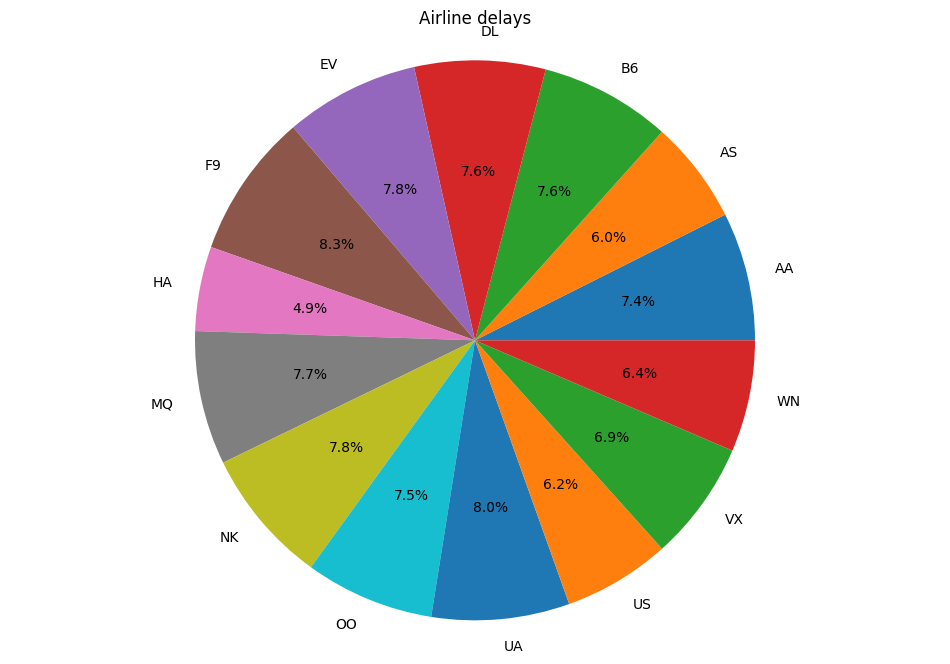

In [56]:
flights.dropna(subset = ['AIRLINE_DELAY'], inplace = True)

air = flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().reset_index()
print(air)

plt.figure(figsize = (12, 8))
plt.pie(air['ARRIVAL_DELAY'], labels = air['AIRLINE'], autopct = '%1.1f%%')
plt.title('Airline delays')
plt.axis('equal')
plt.show()

Средняя задержка по дням недели.

<ipython-input-57-4f71cb2757fa>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meand = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()


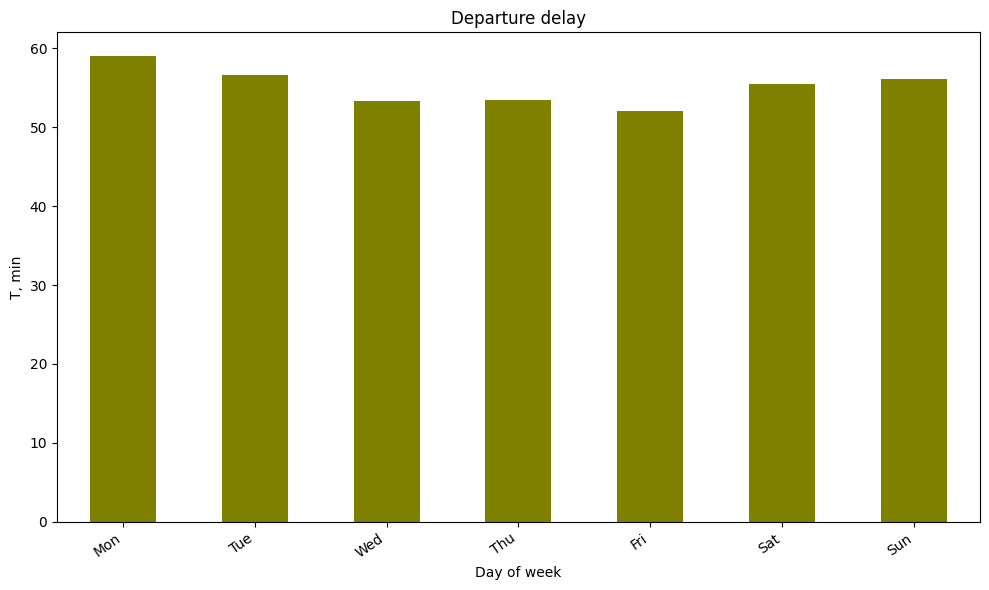

In [57]:
days = {
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat',
    7: 'Sun'
}
flights['DAY_OF_WEEK'] = pd.Categorical(flights['DAY_OF_WEEK'].map(days), categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered = True)

meand = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

meand.plot(kind = 'bar', color = 'olive', figsize = (10, 6))
plt.title('Departure delay')
plt.xlabel('Day of week')
plt.ylabel('T, min')
plt.xticks(rotation = 35, ha = 'right')
plt.tight_layout()
plt.show()

Среднее время задержки из-за разных причин

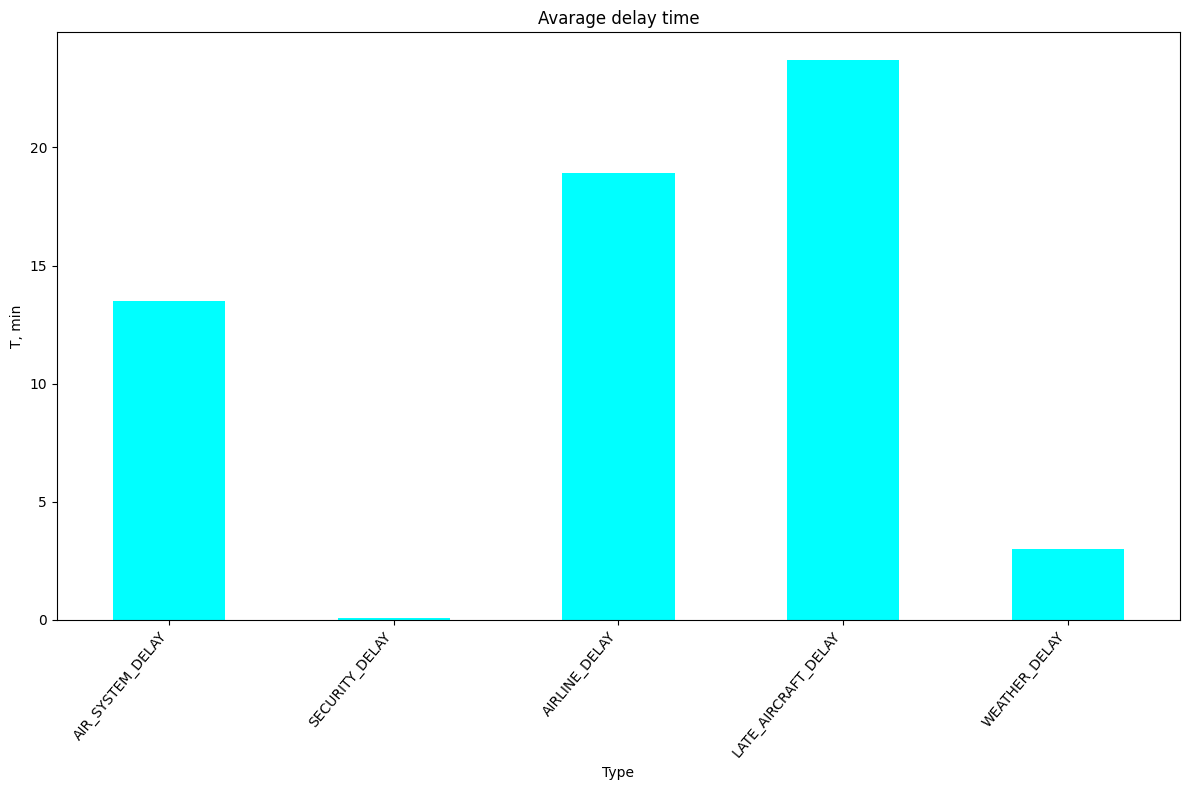

In [58]:
dty = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
mde = flights[dty].mean()

plt.figure(figsize = (12, 8))
mde.plot(kind = 'bar', color = 'cyan')
plt.title('Avarage delay time')
plt.xlabel('Type')
plt.ylabel('T, min')
plt.xticks(rotation = 50, ha = 'right')
plt.tight_layout()
plt.show()

Средняя задержка в зависимости от месяца.

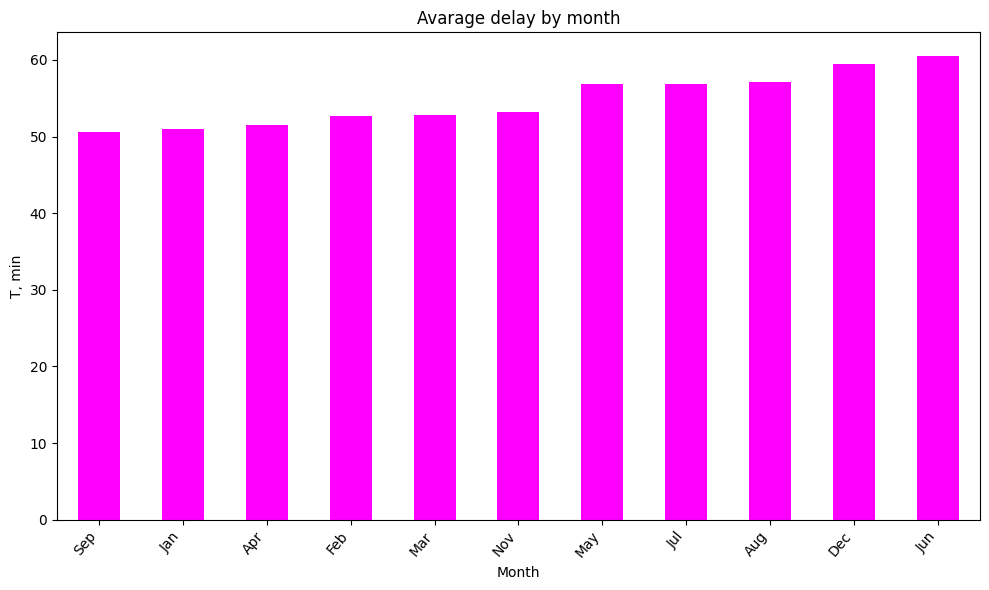

In [59]:
months = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
flights['MONTH'] = flights['MONTH'].map(months)

mdm = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean().sort_values()

plt.figure(figsize = (10, 6))
mdm.plot(kind = 'bar', color = 'magenta')
plt.title('Avarage delay by month')
plt.xlabel('Month')
plt.ylabel('T, min')
plt.xticks(rotation = 50, ha = 'right')
plt.tight_layout()
plt.show()

Вывод:
Благодаря собранным данным можно понять, что среднее время задержки зависит от разных причин таких как: день недели (скорее всего это связано с повышением количества пассижиров в конкретный день), позднее прибытие предыдущего самолета (зависит от авиакомпании).
